# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Molly Strickland

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [21]:
from collections import Counter
import pickle
import requests
import json
import numpy

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
from random import randint
import spacy

from spacytextblob.spacytextblob import SpacyTextBlob

!pip list
print('All prereqs installed.')

All prereqs installed.


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [22]:
#url
url = "https://www.nbcmiami.com/decision-2024/donald-trump-victory-speech-presidential-election/3466001/"
try:
    # Fetch the webpage content
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, "html.parser")

    # Extract the article content
    Victory_speech_article = soup.find('article')
    article_html = Victory_speech_article.prettify() if Victory_speech_article else "Content not found"

    # Save the content to a .pkl file
    output_path = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\2024VictorySpeech.pkl"
    with open(output_path, "wb") as file:
        pickle.dump(article_html, file)

    print(f"Article saved to {output_path}")
except requests.exceptions.RequestException as e:
    print(f"Error fetching the webpage: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
    



#url
url2 = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"

try:
    # Fetch the webpage content
    response = requests.get(url2)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, "html.parser")

    # Debug: Save the fetched HTML to inspect structure
    with open("debug_url2.html", "w", encoding="utf-8") as debug_file:
        debug_file.write(soup.prettify())

    # Extract the article content
    Jan_6_Speech_article2 = soup.find('article') or "Content not found"
    article2_html = Jan_6_Speech_article2.prettify() if Jan_6_Speech_article2 != "Content not found" else Jan_6_Speech_article2

    # Save the content to a .pkl file
    output_path2 = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\Jan6Speech.pkl"
    with open(output_path2, "wb") as file2:
        pickle.dump(article2_html, file2)

    print(f"Article saved to {output_path2}")
except requests.exceptions.RequestException as e:
    print(f"Error fetching the webpage: {e}")
except Exception as e:
    print(f"An error occurred: {e}")




Article saved to C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\2024VictorySpeech.pkl
Article saved to C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\Jan6Speech.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [23]:
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Step 1: Load the `.pkl` files
def load_text_from_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

# File paths
file1 = "2024VictorySpeech.pkl"
file2 = "Jan6Speech.pkl"

# Extract text from the files
text1 = load_text_from_pickle(file1)
text2 = load_text_from_pickle(file2)

# Step 2: Load spaCy with spacytextblob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# Step 3: Perform sentiment analysis and count sentences
def analyze_sentiment(text):
    doc = nlp(text)
    polarity = doc._.polarity  # Sentiment polarity score
    num_sentences = len(list(doc.sents))  # Number of sentences
    return polarity, num_sentences

# Analyze both texts
polarity1, sentences1 = analyze_sentiment(text1)
polarity2, sentences2 = analyze_sentiment(text2)

# Step 4: Print results
print(f"Analysis for {file1}:")
print(f"Polarity Score: {polarity1}")
print(f"Number of Sentences: {sentences1}\n")

print(f"Analysis for {file2}:")
print(f"Polarity Score: {polarity2}")
print(f"Number of Sentences: {sentences2}")


Analysis for 2024VictorySpeech.pkl:
Polarity Score: 0.2008629988380581
Number of Sentences: 365

Analysis for Jan6Speech.pkl:
Polarity Score: 0.052365809311605255
Number of Sentences: 1234


In [26]:
# Extract and print the text content
article_text = soup.get_text()
print(article_text)

# Extract and print the text content
article_text2 = soup.get_text()
print(article_text2)












     Donald Trump
    




    Read Donald Trump's full election victory speech
   

    "America has given us an unprecedented and powerful mandate," Trump said.
   


     By NBC Staff
     
      •
     


       Published November 6, 2024
      

       •
      

       Updated on
       
        November 6, 2024
       
       at
       
        9:45 pm
       
































       NBC Universal, Inc.
      







       President-elect
       
        Donald Trump
       
       declared victory in the
       
        2024 presidential election
       
       over
       
        Kamala Harris
       
       in the early hours of Wednesday morning. The full remarks he made at a campaign rally in West Palm Beach, Florida, are below.
      






         Watch NBC6 free wherever you are
        



          WATCH HERE
         





      Thank you very much. Wow. Well, I want to thank you all very much. This is great. These are our friends. We have t

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [25]:
import pickle
from collections import Counter
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 1: Load the article text from a .pkl file
def load_article(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# File path (adjust as needed)
file_path = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\2024VictorySpeech.pkl"

# Load article text
article_html = load_article(file_path)

# If the text was saved as HTML, use BeautifulSoup to extract the text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 2: Process the text with spaCy
doc = nlp(article_text)

# Step 3: Filter tokens (lowercase, remove stop words, punctuation, etc.)
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and token.is_alpha
]

# Step 4: Count token frequencies
token_freq = Counter(tokens)

# Step 5: Find the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Step 6: Print results
print("Most Common Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")


Most Common Tokens:
Token: going, Frequency: 49
Token: great, Frequency: 33
Token: people, Frequency: 25
Token: said, Frequency: 22
Token: thank, Frequency: 19


In [ ]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 1: Load the article text from a .pkl file
def load_article(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# File path (adjust as needed)
file_path = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\Jan6Speech.pkl"

# Load article text
article_html = load_article(file_path)

# If the text was saved as HTML, use BeautifulSoup to extract the text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 2: Process the text with spaCy
doc = nlp(article_text)

# Step 3: Filter tokens (lowercase, remove stop words, punctuation, etc.)
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and token.is_alpha
]

# Step 4: Count token frequencies
token_freq = Counter(tokens)

# Step 5: Find the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Step 6: Print results
print("Most Common Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")


Most Common Tokens:
Token: people, Frequency: 84
Token: going, Frequency: 74
Token: want, Frequency: 67
Token: know, Frequency: 59
Token: election, Frequency: 50


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [28]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 1: Load the article text from a .pkl file
def load_article(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# File path (adjust as needed)
file_path = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\2024VictorySpeech.pkl"

# Load article text
article_html = load_article(file_path)

# If the text was saved as HTML, use BeautifulSoup to extract the text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 2: Process the text with spaCy
doc = nlp(article_text)

# Step 3: Extract lemmas (lowercase, exclude stop words, punctuation, etc.)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and token.is_alpha
]

# Step 4: Count lemma frequencies
lemma_freq = Counter(lemmas)

# Step 5: Find the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Step 6: Print results
print("Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Most Common Lemmas:
Lemma: go, Frequency: 54
Lemma: great, Frequency: 37
Lemma: people, Frequency: 25
Lemma: say, Frequency: 23
Lemma: want, Frequency: 22


In [29]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Step 1: Load the article text from a .pkl file
def load_article(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# File path (adjust as needed)
file_path = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\Jan6Speech.pkl"

# Load article text
article_html = load_article(file_path)

# If the text was saved as HTML, use BeautifulSoup to extract the text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 2: Process the text with spaCy
doc = nlp(article_text)

# Step 3: Extract lemmas (lowercase, exclude stop words, punctuation, etc.)
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and token.is_alpha
]

# Step 4: Count lemma frequencies
lemma_freq = Counter(lemmas)

# Step 5: Find the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Step 6: Print results
print("Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Most Common Lemmas:
Lemma: go, Frequency: 85
Lemma: people, Frequency: 84
Lemma: vote, Frequency: 83
Lemma: want, Frequency: 71
Lemma: know, Frequency: 70


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

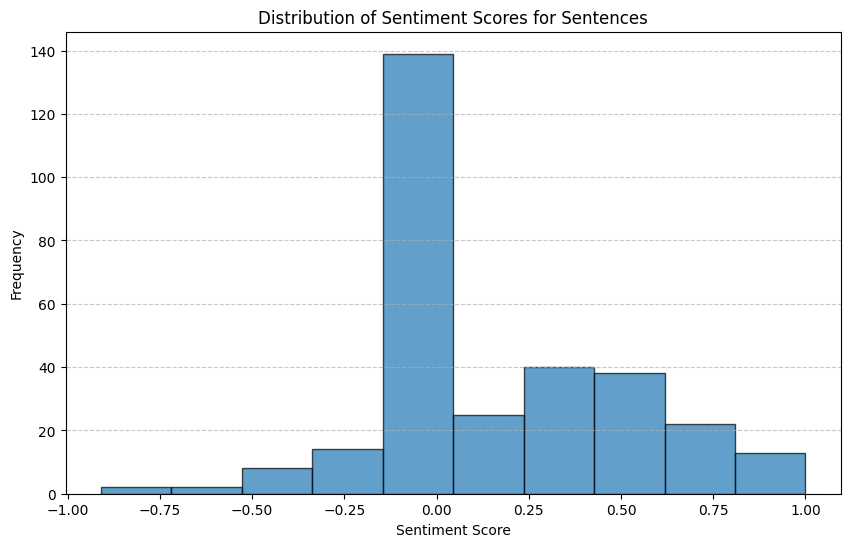

In [30]:
# Step 1: Load the article text from a .pkl file
def load_article(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# File path (adjust as needed)
file_path = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\2024VictorySpeech.pkl"

# Load article text
article_html = load_article(file_path)

# If the text was saved as HTML, use BeautifulSoup to extract the text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 2: Process the text with spaCy
doc = nlp(article_text)

# Step 3: Compute sentiment scores for each sentence
sentence_scores = [sent._.polarity for sent in doc.sents]

# Step 4: Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentiment Scores for Sentences")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


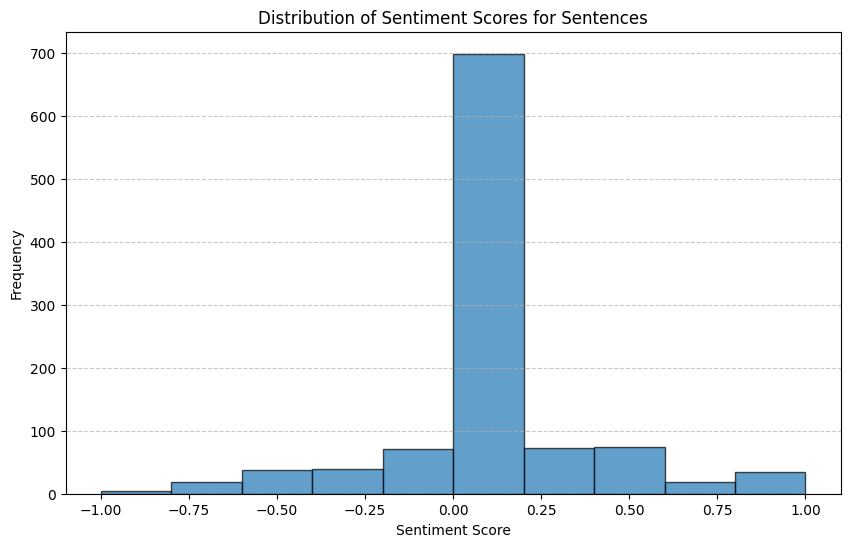

In [31]:
# Step 1: Load the article text from a .pkl file
def load_article(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# File path (adjust as needed)
file_path = r"C:\Users\missm\OneDrive\Documents\MLandNLP\FInal_WS-NLP_Strickland\Jan6Speech.pkl"

# Load article text
article_html = load_article(file_path)

# If the text was saved as HTML, use BeautifulSoup to extract the text
soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()

# Step 2: Process the text with spaCy
doc = nlp(article_text)

# Step 3: Compute sentiment scores for each sentence
sentence_scores = [sent._.polarity for sent in doc.sents]

# Step 4: Plot a histogram of the scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentiment Scores for Sentences")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?